In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/Colab\ Notebooks


Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
!pip install statsmodels==0.13.0
!pip install pmdarima

     |████████████████████████████████| 9.8 MB 35.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 1.4 MB 27.0 MB/s 


In [ ]:
import numpy as np
import pandas as pd

from matplotlib import rcParams
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import missingno

import scipy as sp

# TIME SERIES
from statsmodels.tsa.arima.model import ARIMA # v 0.13.0
#from statsmodels.tsa.arima_model import ARIMA #v 0.12.1
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf,arma_order_select_ic
import statsmodels.stats.diagnostic as smd
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import tensorflow_probability as tfp
tfd = tfp.distributions
tfs = tfp.stats

import pmdarima as pm
from pmdarima.arima.utils import ndiffs

In [ ]:
import glob

#get all csv file names
filepath='Datafor555/CO'
all_files = glob.glob(filepath + "/*.csv")

#put all csv file names into a list
li = []
for filename in all_files:
    yr=filename[-6:-4]
    df_co = pd.read_csv(filename)
    df_co['year']=yr
    li.append(df_co)

#concatenate all csv files into a dataframe
df_CO = pd.concat(li, axis=0)

# df.loc[:,['AverageTemp','YearlyPrecipiation','Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048']]
df_CO_grouped_yearly=df_CO.groupby(['year']).mean()

df_CO_grouped_yearly

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,36,37,38,39,41,44,61,63,66,67,68,69,70,76,77,79,80,86,87,88,98,106,107,108,109,113,114,121,130,131,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,75,80,98) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,36,37,38,39,41,44,61,63,66,67,68,69,70,75,76,77,79,80,86,87,88,98,106,107,108,109,113,114,119,120,121,123,124,128,129,130,131,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-pa

,STATE_CODE_001,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,HISTORY_037,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,...,LEFT_CURB_MT_050A,RIGHT_CURB_MT_050B,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_054B,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,OPERATING_RATING_064,INVENTORY_RATING_066,POSTING_EVAL_070,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_PCNT_098B,STRAHNET_HIGHWAY_100,TRAFFIC_DIRECTION_102,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,SUFFICIENCY_RATING,SUBMITTED_BY,LOWEST_RATING,DECK_AREA,CAT29
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00,8,3.309250,1.254592,0.000000,37.742748,59.096482,8584.402744,90.479554,128.395256,0.357883,0.000000,3.896027e+07,1.045461e+08,29.212436,2.996127,3.312935,3.418295,8.796858,1969.727655,2.311532,0.846647,9357.383049,1997.171166,10.752642,0.245237,15.067538,0.024182,4.984489,0.000000,0.000000,2.080549,4.200708,3.373686,6.029545,0.052272,0.066805,2.208623,0.071533,11.508557,16.262735,...,0.267110,0.265205,9.366222,10.753765,99.384901,0.838715,84.963422,0.367904,44.998643,30.265341,4.718735,34.826087,1.037608,14.395378,691.412318,26.473060,705.266949,794.233766,713.352113,85.929619,9.834546,135.154690,1999.086750,0.000000,0.194512,1.846962,0.275171,0.031082,188.469590,8.379904,0.316663,1.000000,10510.008183,2017.292623,0.000000,81.716675,NaN,NaN,NaN,NaN
01,8,3.337727,1.264517,0.000218,37.677470,58.746595,8246.391328,90.558001,127.507678,0.367037,0.000000,3.835219e+07,1.030806e+08,28.652359,2.993899,3.863527,3.942203,8.843120,1970.720057,2.326106,0.871773,9272.620765,1992.214729,10.854232,0.248134,14.987599,0.024199,4.937154,0.036805,0.000879,2.075607,4.188692,3.401701,6.043943,0.049843,0.064652,2.198482,0.066932,11.716127,16.308563,...,0.270467,0.270876,9.443142,10.835529,98.218939,0.849257,84.936865,0.381820,45.327308,30.520875,4.735941,34.893352,1.041057,13.835628,673.524189,26.472048,684.362791,794.181818,670.623188,133.585988,11.483946,132.609911,1999.324956,0.000000,0.179336,1.844750,0.276174,0.025929,189.218637,8.382932,0.313324,1.000000,10514.933662,2008.392247,0.000000,82.000084,NaN,NaN,NaN,NaN
02,8,3.344454,1.265815,0.000217,37.671018,59.077386,8331.725087,90.429154,126.781195,0.361815,0.000246,3.840633e+07,1.031739e+08,28.728769,2.993718,3.946450,3.981894,8.874567,1971.244789,2.328350,0.881391,10084.391898,1993.685950,10.900974,0.251049,14.916317,0.024218,4.807434,0.036650,0.000875,2.099762,4.185550,3.401561,6.085212,0.050713,0.065220,2.188528,0.068447,11.757385,16.387532,...,0.275039,0.274763,9.497838,10.905562,98.220885,0.843655,84.862019,0.381465,45.761942,30.868055,4.746489,34.897627,1.042341,13.573797,639.335816,26.578146,666.589744,941.515625,771.734694,121.218765,13.416849,168.627248,1999.812543,0.000000,0.173436,1.844324,0.280590,0.025821,189.413619,8.981209,0.311877,1.000000,11868.977581,2009.763070,0.000000,82.224128,NaN,NaN,NaN,NaN
03,8,3.324227,1.248014,0.005115,37.676752,59.004158,4949.787178,90.629793,126.598198,0.359515,0.000000,3.836542e+07,1.031031e+08,18.157036,2.993033,3.700384,3.728681,7.263576,1971.991608,2.335693,0.790619

In [ ]:
d={'92':1992, '93':1993, '94':1994,'95':1995,'96':1996,'97':1997,'98':1998,'99':1999,'00':2000,'01':2001,'02':2002,'03':2003,'04':2004,'05':2005,'06':2006,'07':2007,'08':2008,'09':2009,'10':2010,'11':2011,'12':2012,'13':2013,'14':2014,'15':2015,'16':2016,'17':2017,'18':2018,'19':2019,'20':2020}
df_CO['year']=df_CO['year'].map(d)
df_CO

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29
0,8,003000000.0001A,1,4.0,1.0,6033,0.0,57.0,3.0,0.0,RIO GRANDE RIVER,NaN,STATE STREET,0.6 MI NE OF ALAMOSA,99.99,NaN,NaN,NaN,NaN,37283600.0,105514800.0,6.0,3.0,2.0,2.0,8.0,1982.0,2.0,0.0,945.0,1986.0,5,7.9,0.0,16.0,0.0,1,1,1,0,...,NaN,NaN,NaN,0.0,1,1,0,0,4.0,0.0,NaN,Y,5,1040.0,2012.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,97.7,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,003000102.30010,1,4.0,1.0,1,0.0,57.0,3.0,0.0,SAN LUIS VALLEY CANAL,NaN,CNTY RD 1 MI LANE,8.1 MI SW OF MOSCA,99.99,NaN,NaN,NaN,NaN,37351800.0,105594200.0,2.0,3.0,2.0,2.0,9.0,1971.0,2.0,0.0,60.0,1986.0,0,7.6,0.0,63.0,0.0,0,0,0,0,...,NaN,NaN,NaN,0.0,6,8,0,0,4.0,0.0,NaN,Y,8,70.0,2012.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,62.3,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,003000202.90011,1,4.0,1.0,2,0.0,57.0,3.0,0.0,HOOPER LATERAL,NaN,CNTY RD 2 MI LANE,7.1 MI SW OF MOSCA,99.99,NaN,NaN,NaN,NaN,37360600.0,105590600.0,3.0,3.0,2.0,2.0,9.0,1970.0,2.0,0.0,40.0,1986.0,0,7.3,0.0,9.0,0.0,0,0,0,0,...,NaN,NaN,NaN,0.0,8,6,0,0,4.0,0.0,NaN,Y,8,40.0,2012.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,78.2,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,003000403.50012,1,4.0,1.0,4,0.0,57.0,3.0,0.0,HOOPER LATERAL,NaN,CNTY RD 4 MI LANE,5.8 MI SW OF MOSCA,99.99,NaN,NaN,NaN,NaN,37374800.0,105581800.0,6.0,3.0,2.0,2.0,9.0,1950.0,2.0,0.0,35.0,1986.0,0,7.0,0.0,20.0,0.0,0,0,0,0,...,NaN,NaN,NaN,0.0,N,N,N,N,4.0,0.0,NaN,Y,8,40.0,2012.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,96.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,003000504.40013,1,4.0,1.0,5,0.0,57.0,3.0,0.0,HOOPER LATERAL,NaN,CNTY RD 5 MI LANE,5.0 MI W OF MOSCA,99.99,NaN,NaN,NaN,NaN,37383600.0,105573000.0,3.0,3.0,2.0,2.0,8.0,1950.0,2.0,0.0,175.0,1986.0,0,7.6,0.0,15.0,0.0,0,0,0,0,...,NaN,NaN,NaN,0.0,N,N,N,N,4.0,0.0,NaN,Y,8,190.0,2012.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,*,85.4,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,8,YUMU-13.10-A,1,4.0,1.0,0,0.0,41.0,125.0,0.0,Arikaree River,NaN,County Road U,3.10 Mi N of Co Rd 10,99.99,0.0,0.0,0,0.0,39453600.0,102275070.0,18.0,3.0,2.0,2.0,7.0,1995.0,2.0,0.0,40.0,2012.0,5,7.3,0.0,0.0,0.0,1,0,1,0,...,NaN,0.0,0.0,0.0,9,1,0,1,0.0,0.0,NaN,Y,5,57.0,2032.0,0.0,N,,,,,,,,,,,,0,,99.0,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8608,8,YUMX-03.15,1,4.0,1.0,0,0.0,41.0,125.0,0.0,North Sand Creek,NaN,County Road X,0.15 Mi N of Co Rd 3,99.99,0.0,0.0,0,0.0,39370070.0,102240320.0,6.0,3.0,2.0,2.0,9.

In [ ]:
weatherdata = pd.read_csv("Datafor555/avg_temp.CO.csv", index_col=False)
COweather = weatherdata.loc[:,['year','avg_temp','avg_prcp','max_temp','min_temp']]
COweather

,year,avg_temp,avg_prcp,max_temp,min_temp
0,2020,24.7,0.72,61.7,32.8
1,2019,23.7,1.38,59.0,31.5
2,2018,26.8,0.81,61.3,33.0
3,2017,27.0,2.29,61.8,34.1
4,2016,24.4,1.02,61.3,33.3
5,2015,24.7,0.65,60.8,34.1
6,2014,28.2,1.18,59.7,32.4
7,2013,29.8,0.91,58.9,31.2
8,2012,29.1,0.69,62.9,33.7
9,2011,24.7,0.71,59.5,31.4


In [ ]:
df1_CO=df_CO.merge(COweather, left_index=False)
df1_CO

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29,avg_temp,avg_prcp,max_temp,min_temp
0,8,003000000.0001A,1,4.0,1.0,6033,0.0,57.0,3.0,0.0,RIO GRANDE RIVER,NaN,STATE STREET,0.6 MI NE OF ALAMOSA,99.99,NaN,NaN,NaN,NaN,37283600.0,105514800.0,6.0,3.0,2.0,2.0,8.0,1982.0,2.0,0.0,945.0,1986.0,5,7.9,0.0,16.0,0.0,1,1,1,0,...,1,1,0,0,4.0,0.0,NaN,Y,5,1040.0,2012.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,97.7,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.4,0.70,58.7,31.9
1,8,003000102.30010,1,4.0,1.0,1,0.0,57.0,3.0,0.0,SAN LUIS VALLEY CANAL,NaN,CNTY RD 1 MI LANE,8.1 MI SW OF MOSCA,99.99,NaN,NaN,NaN,NaN,37351800.0,105594200.0,2.0,3.0,2.0,2.0,9.0,1971.0,2.0,0.0,60.0,1986.0,0,7.6,0.0,63.0,0.0,0,0,0,0,...,6,8,0,0,4.0,0.0,NaN,Y,8,70.0,2012.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,62.3,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.4,0.70,58.7,31.9
2,8,003000202.90011,1,4.0,1.0,2,0.0,57.0,3.0,0.0,HOOPER LATERAL,NaN,CNTY RD 2 MI LANE,7.1 MI SW OF MOSCA,99.99,NaN,NaN,NaN,NaN,37360600.0,105590600.0,3.0,3.0,2.0,2.0,9.0,1970.0,2.0,0.0,40.0,1986.0,0,7.3,0.0,9.0,0.0,0,0,0,0,...,8,6,0,0,4.0,0.0,NaN,Y,8,40.0,2012.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,78.2,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.4,0.70,58.7,31.9
3,8,003000403.50012,1,4.0,1.0,4,0.0,57.0,3.0,0.0,HOOPER LATERAL,NaN,CNTY RD 4 MI LANE,5.8 MI SW OF MOSCA,99.99,NaN,NaN,NaN,NaN,37374800.0,105581800.0,6.0,3.0,2.0,2.0,9.0,1950.0,2.0,0.0,35.0,1986.0,0,7.0,0.0,20.0,0.0,0,0,0,0,...,N,N,N,N,4.0,0.0,NaN,Y,8,40.0,2012.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,96.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.4,0.70,58.7,31.9
4,8,003000504.40013,1,4.0,1.0,5,0.0,57.0,3.0,0.0,HOOPER LATERAL,NaN,CNTY RD 5 MI LANE,5.0 MI W OF MOSCA,99.99,NaN,NaN,NaN,NaN,37383600.0,105573000.0,3.0,3.0,2.0,2.0,8.0,1950.0,2.0,0.0,175.0,1986.0,0,7.6,0.0,15.0,0.0,0,0,0,0,...,N,N,N,N,4.0,0.0,NaN,Y,8,190.0,2012.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,*,85.4,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.4,0.70,58.7,31.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258783,8,YUMU-13.10-A,1,4.0,1.0,0,0.0,41.0,125.0,0.0,Arikaree River,NaN,County Road U,3.10 Mi N of Co Rd 10,99.99,0.0,0.0,0,0.0,39453600.0,102275070.0,18.0,3.0,2.0,2.0,7.0,1995.0,2.0,0.0,40.0,2012.0,5,7.3,0.0,0.0,0.0,1,0,1,0,...,9,1,0,1,0.0,0.0,NaN,Y,5,57.0,2032.0,0.0,N,,,,,,,,,,,,0,,99.0,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8,0.91,58.9,31.2
258784,8,YUMX-03.15,1,4.0,1.0,0,0.0,41.0,125.0,0.0,North Sand Creek,NaN,County Road X,0.15 Mi N of Co Rd 3,99.99,0.0,0.0,0,0.0,39370070.0,102240320.0,6.0,3.0,2.0,2.0,9.0,1968.0,2.0,0.

In [ ]:
df1_CO['Age_of_Bridge'] = df1_CO['year']-df1_CO['YEAR_BUILT_027']
df2_CO=df1_CO.loc[:,['avg_temp','avg_prcp','min_temp','max_temp','Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048','MAIN_UNIT_SPANS_045','ROADWAY_WIDTH_MT_051','APPR_WIDTH_MT_032','DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060']]
df2_CO.dropna(inplace=True)
df3_CO=df2_CO[(df2_CO['SUBSTRUCTURE_COND_060']!='N') & (df2_CO['SUPERSTRUCTURE_COND_059']!='N') & (df2_CO['DECK_COND_058']!='N')]
for col in df3_CO:
  df3_CO[col]=df3_CO[col].astype(float)
df3_CO

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age_of_Bridge,TRAFFIC_LANES_ON_028A,ADT_029,MAX_SPAN_LEN_MT_048,avg_temp,avg_prcp,min_temp,max_temp,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
0,10.0,2.0,945.0,28.3,27.4,0.70,31.9,58.7,5.0,7.0,7.0
1,21.0,2.0,60.0,18.0,27.4,0.70,31.9,58.7,6.0,6.0,7.0
2,22.0,2.0,40.0,7.3,27.4,0.70,31.9,58.7,6.0,7.0,7.0
6,32.0,2.0,95.0,6.4,27.4,0.70,31.9,58.7,5.0,3.0,5.0
7,23.0,2.0,45.0,17.4,27.4,0.70,31.9,58.7,4.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
258783,18.0,2.0,40.0,26.7,29.8,0.91,31.2,58.9,7.0,7.0,6.0
258784,45.0,2.0,19.0,11.8,29.8,0.91,31.2,58.9,6.0,6.0,5.0
258785,16.0,2.0,19.0,17.1,29.8,0.91,31.2,58.9,7.0,7.0,7.0
258786,73.0,2.0,39.0,13.4,29.8,0.91,31.2,58.9,6.0,6.0,5.0


In [ ]:
# Separate the Feature data X from the response data y1,y2,y3
X=df3_CO.iloc[:,:-3] # All columns except for the last 3 columns
y1=df3_CO.iloc[:,-3] #The last column would be our response variable in our case, Deck Condition
y2=df3_CO.iloc[:,-2]  #The last column would be our response variable in our case, SuperStructure Condition
y3=df3_CO.iloc[:,-1]  #The last column would be our response variable in our case, Substructure Condition

For the Deck

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
model.best_estimator_

KNeighborsClassifier()

In [ ]:
pred=model.predict(X_test)
pred

array([7., 7., 7., ..., 8., 7., 7.])

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, pred)

0.5944405403295073

In [ ]:
# Print the accuracy score
print(f'the accuracy score value for the deck is {metrics.accuracy_score(y_test, pred)*100 :.2f}%')

the accuracy score value for the deck is 59.44%


For the SuperStructure

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X1_train, X1_test, y1_train, y1_test = train_test_split(X.values, y2.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X1_train,y1_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
model.best_estimator_

KNeighborsClassifier()

In [ ]:
pred=model.predict(X1_test)
pred

array([7., 8., 7., ..., 8., 7., 5.])

In [ ]:
pred10years = model.predict(np.array([10,2,50,40,25,1,32,59]).reshape(1,-1))[0]
pred10years

7.0

In [ ]:
for i in range(10,100,10):
  pred_i = model.predict(np.array([i,2,50,40,25,1,32,59]).reshape(1,-1))[0]
  print(i,pred_i)

10 7.0
20 7.0
30 7.0
40 5.0
50 5.0
60 5.0
70 7.0
80 6.0
90 6.0


In [ ]:
KA = []
for i in range(10,150,10):
  for j in range (1,3,1):
    for k in range(10,5000,10):
      pred_i = model.predict(np.array([i,j,k,40,25,1,32,59]).reshape(1,-1))[0]
      print(i,j,k,pred_i)
      KA.append(pred_i)

Streaming output truncated to the last 5000 lines.
90 2 4900 6.0
90 2 4910 6.0
90 2 4920 5.0
90 2 4930 5.0
90 2 4940 5.0
90 2 4950 5.0
90 2 4960 5.0
90 2 4970 5.0
90 2 4980 5.0
90 2 4990 7.0
100 1 10 6.0
100 1 20 5.0
100 1 30 4.0
100 1 40 4.0
100 1 50 5.0
100 1 60 5.0
100 1 70 2.0
100 1 80 2.0
100 1 90 4.0
100 1 100 4.0
100 1 110 4.0
100 1 120 4.0
100 1 130 4.0
100 1 140 6.0
100 1 150 6.0
100 1 160 4.0
100 1 170 4.0
100 1 180 5.0
100 1 190 5.0
100 1 200 2.0
100 1 210 5.0
100 1 220 5.0
100 1 230 5.0
100 1 240 7.0
100 1 250 6.0
100 1 260 6.0
100 1 270 6.0
100 1 280 6.0
100 1 290 6.0
100 1 300 6.0
100 1 310 6.0
100 1 320 5.0
100 1 330 5.0
100 1 340 5.0
100 1 350 5.0
100 1 360 6.0
100 1 370 6.0
100 1 380 6.0
100 1 390 6.0
100 1 400 5.0
100 1 410 6.0
100 1 420 6.0
100 1 430 6.0
100 1 440 5.0
100 1 450 5.0
100 1 460 5.0
100 1 470 5.0
100 1 480 6.0
100 1 490 6.0
100 1 500 6.0
100 1 510 8.0
100 1 520 5.0
100 1 530 5.0
100 1 540 6.0
100 1 550 6.0
100 1 560 6.0
100 1 570 6.0
100 1 580 6.0
100 1 

In [ ]:
for i in range(10,100,10):
  pred_i = model.predict(np.array([i,2,50,40,25,1,32,59]).reshape(1,-1))[0]
  print(i,pred_i)

10 7.0
20 7.0
30 7.0
40 5.0
50 5.0
60 5.0
70 7.0
80 6.0
90 6.0


In [ ]:
pred_i

6.0

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y1_test, pred)

0.6153145415267692

In [ ]:
# Print the accuracy score
print(f'The accuracy score value for the Superstructure is {metrics.accuracy_score(y1_test, pred)*100 :.2f}%')

The accuracy score value for the Superstructure is 61.53%


For SubStructure

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X2_train, X2_test, y2_train, y2_test = train_test_split(X.values, y3.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X2_train,y2_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
model.best_estimator_

KNeighborsClassifier()

In [ ]:
pred=model.predict(X2_test)
pred

array([6., 8., 6., ..., 8., 3., 7.])

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y2_test, pred)

0.46937872517633583

In [ ]:
# Print the accuracy score
print(f'the accuracy score value for the Sub-Structure is {metrics.accuracy_score(y2_test, pred)*100 :.2f}%')

the accuracy score value for the Sub-Structure is 46.94%


Correlation

In [ ]:
df3_CO.corr()

In [ ]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df3_CO.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG');
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
np.triu(np.ones_like(df3_CO.corr()))

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df3_CO.corr(), dtype=np.bool))
heatmap = sns.heatmap(df3_CO.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Gradient Boosting Trees for Deck

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X1_train, X1_test, y1_train, y1_test = train_test_split(X.values, y2.values, test_size = 0.2, random_state=42)

Gradient Boosting Trees for SuperStructure

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X1_train, y1_train)
clf.score(X1_test, y1_test)

Gradient Boosting Trees for SubStrucute

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X2_train, y2_train)
clf.score(X2_test, y2_test)

**Visualization of Current Deck and Superstructure Materials**

In [ ]:
#Visualizing current deck structure parameters
#Deck structure type is 106,wearing surface is 107,membrane type is 108,deck protection is 109
Vis=pd.read_csv("Datafor555/CO/CO20.csv")
Vis.iloc[:,106]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (71,73,102) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0       1
1       1
2       1
3       1
4       N
       ..
8824    9
8825    6
8826    9
8827    8
8828    1
Name: DECK_STRUCTURE_TYPE_107, Length: 8829, dtype: object

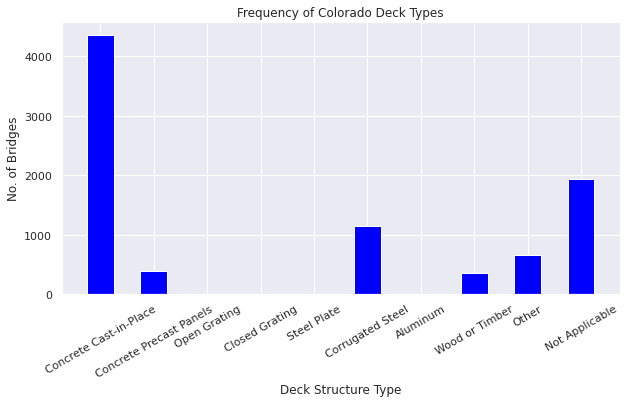

In [ ]:
Vis['DECK_STRUCTURE_TYPE_107'].value_counts()
# 1 Concrete Cast-in-Place 2 Concrete Precast Panels 3 Open Grating 4 Closed Grating 5 Steel plate 6 Corrugated Steel 7 Aluminum 8 Wood or Timber 9 Other N Not applicable
data_dict = {'Concrete Cast-in-Place':4351, 'Concrete Precast Panels':393, 'Open Grating':4, 'Closed Grating':0,'Steel Plate':6,'Corrugated Steel':1139,'Aluminum':4,'Wood or Timber':349,'Other':648,'Not Applicable':1935}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='blue',
        width = 0.5)
plt.xlabel("Deck Structure Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Colorado Deck Types")
plt.show()

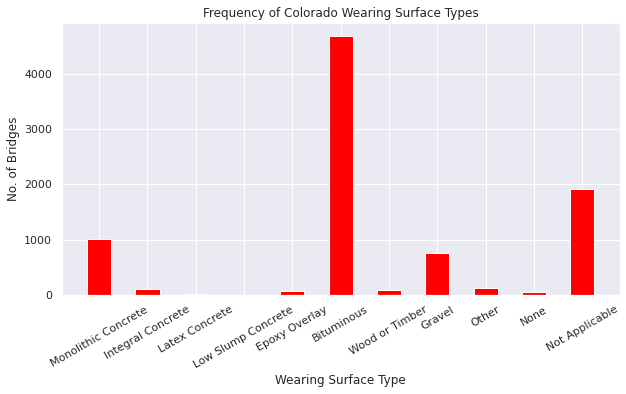

In [ ]:
Vis['SURFACE_TYPE_108A'].value_counts()
#1 Monolithic Concrete 2 Integral Concrete 3 Latex Concrete 4 Low Slump Concrete 5 Epoxy Overlay 6 Bituminous 7 Wood or Timber 8 Gravel 9 Other 0 None (no additional concrete thickness or N Not Applicable (applies only to structures
data_dict = {'Monolithic Concrete':1017, 'Integral Concrete':104, 'Latex Concrete':15, 'Low Slump Concrete':5,'Epoxy Overlay':72,'Bituminous':4679,'Wood or Timber':98,'Gravel':751,'Other':122, 'None':55,'Not Applicable':1911}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='red',
        width = 0.5)
plt.xlabel("Wearing Surface Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Colorado Wearing Surface Types")
plt.show()

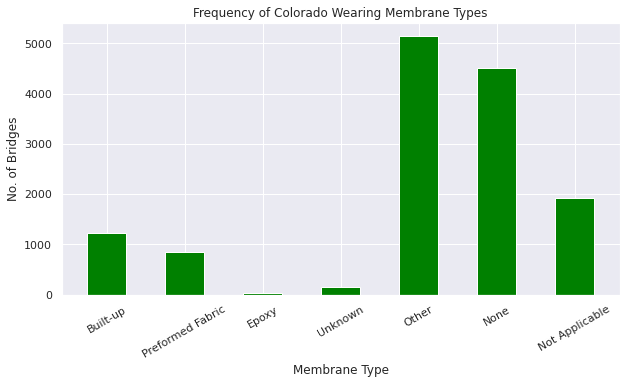

In [ ]:
Vis['MEMBRANE_TYPE_108B'].value_counts()
# 1 Built-up 2 Preformed Fabric 3 Epoxy 8 Unknown 9 Other 0 None N Not Applicable 
data_dict = {'Built-up':1220, 'Preformed Fabric':857, 'Epoxy':29, 'Unknown':156,'Other':5147,'None':4507,'Not Applicable':1913}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='green',
        width = 0.5)
plt.xlabel("Membrane Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Colorado Wearing Membrane Types")
plt.show()

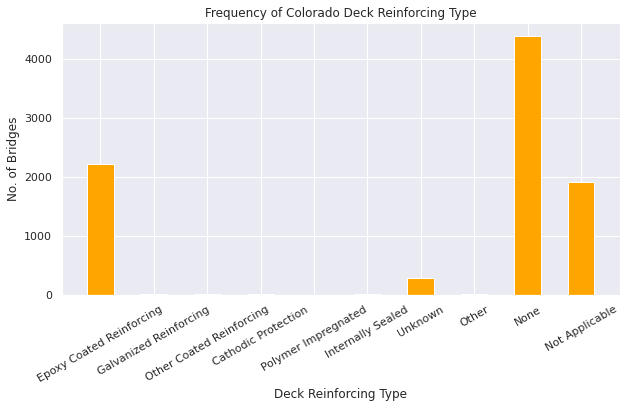

In [ ]:
Vis['DECK_PROTECTION_108C'].value_counts()
#1 Epoxy Coated Reinforcing 2 Galvanized Reinforcing 3 Other Coated Reinforcing 4 Cathodic Protection 6 Polymer Impregnated 7 Internally Sealed8 Unknown 9 Other 0 None N Not Applicable
data_dict = {'Epoxy Coated Reinforcing':2223, 'Galvanized Reinforcing':7, 'Other Coated Reinforcing':4, 'Cathodic Protection':10,'Polymer Impregnated':0,'Internally Sealed':2,'Unknown':272,'Other':5,'None':4396,'Not Applicable':1908}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='orange',
        width = 0.5)
plt.xlabel("Deck Reinforcing Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Colorado Deck Reinforcing Type")
plt.show()

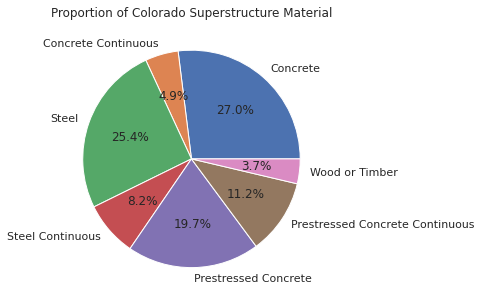

In [ ]:
#Superstructure material Material is 47, structure type is 48
import matplotlib.pyplot as plt
Vis['STRUCTURE_KIND_043A'].value_counts()
#1 Concrete 2 Concrete continuous 3 Steel 4 Steel continuous 5 Prestressed concrete * 6 Prestressed concrete continuous * 7 Wood or Timber 8 Masonry 9 Aluminum, Wrought Iron, or Cast Iron 0 Other
data_dict={'Concrete':2352,'Concrete Continuous':430,'Steel':2214,'Steel Continuous':712,'Prestressed Concrete':1718,'Prestressed Concrete Continuous':975,'Wood or Timber':321}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.pie(values, labels=types,autopct='%1.1f%%')
plt.title("Proportion of Colorado Superstructure Material")
plt.show()